# import 

In [12]:
%load_ext autoreload

In [201]:
import pandas as pd
from modules.constants import LocalPaths
from modules.training import LearnXGB
from modules import funcs
from modules.simulation import XGBSimulation, XGBSimulation2, TechnicalSimulation, CeilSimulation,UpDownSimulation
from modules.preprocessing import MakeTrainData,MakeTrainData3,DataFramePreProcessing

In [13]:
%autoreload



1.840087890625

# XGB の学習のさせ方

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


---------------------
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       248
           1       0.48      0.52      0.50       320
           2       0.51      0.51      0.51       246

    accuracy                           0.49       814
   macro avg       0.49      0.49      0.49       814
weighted avg       0.49      0.49      0.49       814



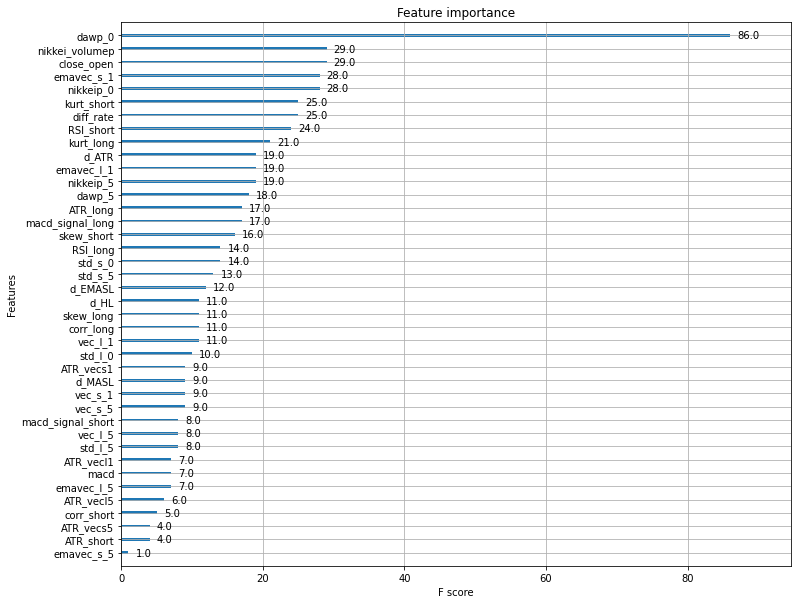

In [12]:
"""
    num_class : 分類するクラス数
                default = 2
                2 クラス　または 3 クラス分類
                2 クラス分類　-> UP or DOWN の予測
                3 クラス分類  -> UP or STAY or DOWN の予測
"""
lx = LearnXGB(num_class=3)
lx.learn_xgb(LocalPaths.RAW_TOPIX_PATH,LocalPaths.RAW_DAW_PATH)

In [259]:
tup_ = lx.make_xgb_data(LocalPaths.RAW_TOPIX_PATH,LocalPaths.RAW_DAW_PATH)

In [261]:
tup_[0]

,dawp_5,dawp_0,nikkeip_5,nikkeip_0,diff_rate,close_open,nikkei_volumep,std_s_5,std_s_0,std_l_5,...,RSI_long,d_OC,d_HL,ATR_short,ATR_long,d_ATR,ATR_vecs5,ATR_vecs1,ATR_vecl5,ATR_vecl1
day,,,,,,,,,,,,,,,,,,,,,
2004-12-16,0.005583,0.001327,-0.009955,-0.002693,0.009901,0.003600,0.708393,9.418068,9.874209,10.563301,...,63.365792,0.996400,1.009973,9.2,11.28,0.815603,-4.8,-1.6,-0.48,0.08
2004-12-17,-0.000910,-0.005205,-0.001828,0.006301,0.013417,0.008050,0.050411,7.854935,8.757854,11.087981,...,60.637454,0.991950,1.013526,10.6,11.60,0.913793,-1.2,1.4,0.08,0.32
2004-12-20,0.009020,0.001097,0.002747,0.003578,0.006239,0.005348,0.156641,5.594640,5.549775,11.431390,...,58.165098,0.994652,1.006272,10.6,11.24,0.943060,-1.0,0.0,-0.04,-0.36
2004-12-21,0.003584,0.009176,0.011872,0.004456,0.005324,0.003549,-0.471863,7.190271,6.348228,11.176612,...,59.104401,0.996451,1.005343,9.2,10.84,0.848708,-2.6,-1.4,-0.72,-0.40
2004-12-22,0.001405,0.005247,0.005415,0.006211,0.005291,0.001764,0.433119,9.787747,8.734987,11.239810,...,60.546226,0.998236,1.005314,9.0,10.44,0.862069,-1.8,-0.2,-0.76,-0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-14,0.004969,0.004455,0.007901,0.016251,0.011993,0.010280,-0.529793,14.342245,25.540164,23.094155,...,58.968426,0.989720,1.012132,19.6,16.32,1.200980,0.2,1.2,0.32,0.12
2018-08-15,-0.001762,-0.005435,0.000000,-0.007995,0.014968,-0.009211,-0.288363,7.628892,22.478879,22.812862,...,53.802860,1.009211,1.015038,21.8,16.76,1.300716,3.2,2.2,1.08,0.44
2018-08-16,-0.002913,0.015750,-0.002240,-0.005757,0.015055,0.004632,1.462196,5.830952,15.709870,22.523173,...,64.257584,0.995368,1.015240,24.4,17.00,1.435294,8.6,2.6,1.44,0.24


# simulation 

## xgb　simulation

   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          56.5         2.26           34       154.0       -89.0   

   mean_profit  cant_buy_count  
1     1.661765               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.456432      0.507246        0.441441         0.42623   0.472973   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.544444     0.337662    74.0      90.0      77.0  

trigger_count : 1


<Figure size 432x288 with 0 Axes>

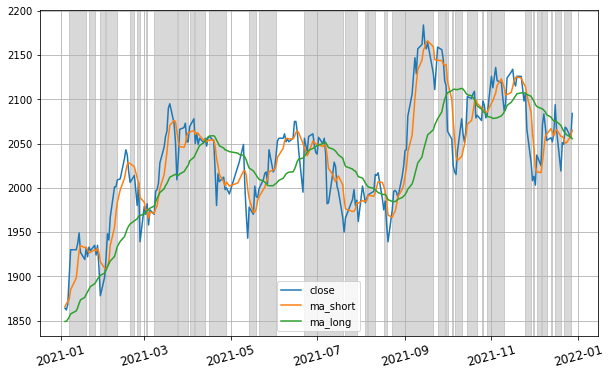

In [31]:
"""
total_profit    : 1株あたりの利益, 下の例では 150.5 円の利益, 通常100株なので15,050円程の利益
profit rate     : 資本金25万円あたりの収益率, 下の例では 6.02%
trade_count     : simulation期間内の取引回数, 下の例では 19 回
max_profit      : simulation期間内の一回の取引での最大利益, 下の例では134円/株
min_profit      : simulation期間内の一回の取引での最小利益, 下の例では-75円/株
mean_profit     : 取引一回当たりの平均収益, 下の例では7.92円/株
cant_buy_count  : 余力が足りなく, 買えなかった回数
trigger_count   : 短期的取引としているため, 20日以上保有しようとした場合, 強制的に売り出す. その回数
"""

# sl = XGBSimulation(lx) # 2クラス分類の時
# 3 クラス分類の時は, XGBSimulation2 でsimulate する
sl = XGBSimulation2(lx)
sl.simulate(
            LocalPaths.RAW_TOPIX_PATH,  # csv ファイルを読み込むためのパス
            LocalPaths.RAW_DAW_PATH,    # DAW のファイル
            start_year=2021,            # simulate 開始の年
            end_year=2021,              # simulate 終了の年
            start_month=1,              # simulate 開始の月
            end_month=12,               # simulate 開始の月
            strategy='normal',          # 'normal' -> 順張り戦略, 'reverse' -> 逆張り戦略
            is_variable_strategy=False  # 順張り, 逆張り両方使う戦略
            )



## Technical 分析 simulation

   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         583.5        23.34           74       583.5       -98.0   

   mean_profit  cant_buy_count  
1    15.193333               0  



<Figure size 432x288 with 0 Axes>

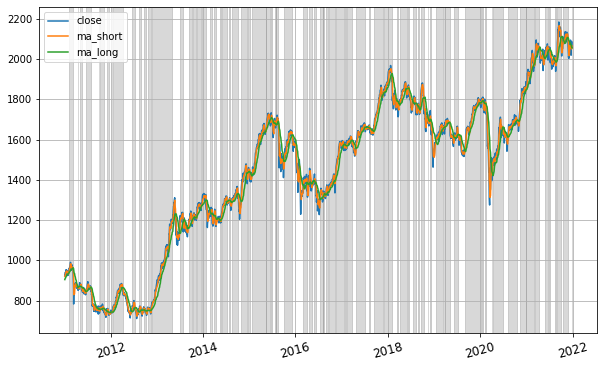

In [38]:
ts = TechnicalSimulation(
    ma_short=5,     # 短期移動平均線　5日分
    ma_long=25,     # 長期移動平均線
    hold_day=100,   # ゴールデンクロスが発生してから, 最長何日保有するか決める, 先にデッドクロスが発生した場合は売りを優先
)

ts.simulate(
    LocalPaths.RAW_TOPIX_PATH,
    LocalPaths.RAW_DAW_PATH,
    start_year=2011,
    end_year=2021,
    start_month=1,
    end_month=12
)

## 天井度　simulation

   total_profit  profit rate  trade_count  max_profit  min_profit  \
1        -125.0         -5.0            8        70.0      -392.0   

   mean_profit  cant_buy_count  
1      -15.625               0  

trigger_count : 5


<Figure size 432x288 with 0 Axes>

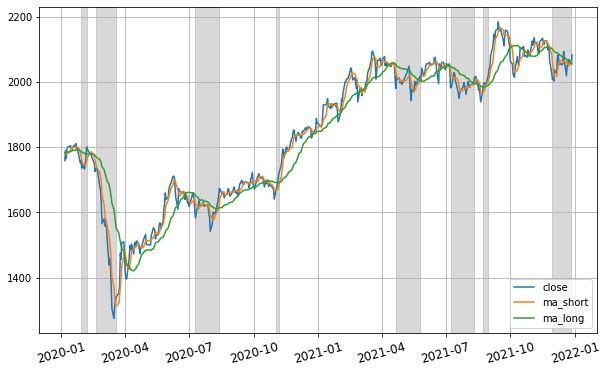

In [43]:
cs = CeilSimulation(
    alpha=0.8,
    beta=0.01
)

cs.simulate(
    LocalPaths.RAW_TOPIX_PATH, 
    LocalPaths.RAW_DAW_PATH,
    start_year=2020,
    end_year=2022,
    start_month=1,
    end_month=12,
    is_observed=False,
    width=30,
    stride=1
    )


In [ ]:
value_list = funcs.make_value_list(
    lx,
    2021,
    2021,
    LocalPaths.RAW_TOPIX_PATH,
    LocalPaths.RAW_DAW_PATH,
    alpha=0.34,
    width=20,
    stride=10,
    start_month=1,
    end_month=12
    )

# 業種別　プロット
1. 業種別データ読み込み
2. 業種別 xgb 作成
3. simulate
4. グループ毎にプロット
5. グループ毎に平均化


In [100]:
import glob

def get_gyosyu_df():
    path_gyosyu = '/Users/Owner/Desktop/StockPriceData/Gyosyu_encoded/'
    FILE = glob.glob(path_gyosyu+'*.csv')
    df_dict = {}
    for file in FILE:
        name = file.replace('/Users/Owner/Desktop/StockPriceData/Gyosyu_encoded\\','')[:-4]
        df = pd.read_csv(file)
        df = df.rename(columns={df.columns[0]:'nan',df.columns[1]:'nan',df.columns[2]:'nan',\
                                    df.columns[3]:'day',df.columns[4]:'nan',df.columns[5]:'open',\
                                    df.columns[6]:'high',df.columns[7]:'low',df.columns[8]:'close',\
                                        df.columns[9]:'volume',})
        df = df.drop('nan',axis=1)
        df = df.drop(df.index[0])
        df['day'] = pd.to_datetime(df['day'],format='%Y/%m/%d')
        df.set_index('day',inplace=True)
        df_dict[name] = df

    return df_dict,FILE

In [271]:
group1 = ['KOUGYO','TEKKOU','DENKI_GASS','GINKOU','KUUUN','SYOUKEN_SAKIMONO','KAIUN','SEKIYU_SEKITAN','HUDOUSAN','SENI','HIKINZOKU']
group2 = ['YUSOUYOUKIKI','GOMU','KINZOKU','SYOKURYO','RIKUUN','GARAS_DOSEKI','SONOTAKINYUU','SOUKO_UNYU','KENSETSU','PARUPU_KAMI','SUISAN_NOURINGYO']
group3 = ['HOKEN','IYAKUHIN','KOURI','KIKAI','KAGAKU','OROSIURI','DENKIKIKI','JOUHOU_TSUUSIN','SONOTA_SEIHIN','SERVICE','SEIMITSUKIKI']


df_dict, FILE = get_gyosyu_df()

In [277]:
def make_df_con(df_tpx):
    df_daw = DataFramePreProcessing(LocalPaths.RAW_DAW_PATH,is_daw=True).load_df()
    daw_p = df_daw.pct_change()
    tpx_p = df_tpx.pct_change()
    tpx_p = tpx_p.rename(columns={'close':'pclose'})
    df_daw = df_daw.rename(columns={'dopen':'daw_close'})
    df_con = pd.concat([df_daw['daw_close'],df_tpx,daw_p['dclose']],axis = 1,join='inner').astype(float)
    df_con['pclose'] = df_con['close'].pct_change()
    df_con = df_con.drop(df_con[ df_con['volume']==0].index)
    return df_con

In [145]:
import pickle
# with open('save_gyosyu_dict.pickle', 'wb') as p:
#     pickle.dump(save_gyosyu_dict, p)
# with open('save_gyosyu_dict.pickle', 'rb') as p:
#     l = pickle.load(p)

In [117]:
pr_log_dict_nor_gyosyu['DENKIKIKI']

[2.0,
 6.800000000000001,
 4.5600000000000005,
 11.799999999999999,
 -0.6,
 3.8,
 2.7199999999999998,
 4.88,
 4.44,
 4.58]

# ex_tpx_dict 作成

In [187]:



group1 = ['KOUGYO','TEKKOU','DENKI_GASS','GINKOU','KUUUN','SYOUKEN_SAKIMONO','KAIUN','SEKIYU_SEKITAN','HUDOUSAN','SENI','HIKINZOKU']
group2 = ['YUSOUYOUKIKI','GOMU','KINZOKU','SYOKURYO','RIKUUN','GARAS_DOSEKI','SONOTAKINYUU','SOUKO_UNYU','KENSETSU','PARUPU_KAMI','SUISAN_NOURINGYO']
group3 = ['HOKEN','IYAKUHIN','KOURI','KIKAI','KAGAKU','OROSIURI','DENKIKIKI','JOUHOU_TSUUSIN','SONOTA_SEIHIN','SERVICE','SEIMITSUKIKI']
labels1 = ['鉱業','鉄鋼','電気ガス','銀行','空運','証券先物','海運','石油石炭','不動産','繊維','非金属']
labels2 = ['輸送用機器','ゴム','金属','食料','陸運','ガラス土石','その他金融','倉庫運輸','建設','パルプ紙 ','水産農林業']
labels3 = ['保険','医薬品','小売','機械','化学','卸売','電気機器','情報通信','その他製品','サービス','精密機器']

#############################
pr_list1_no = []
pr_list1_rv = []

for key in group1:
    pr_list1_no.append(sum(pr_log_dict_nor_gyosyu[key]))
    pr_list1_rv.append(sum(pr_log_dict_rev_gyosyu[key]))

################################### 
pr_list2_no = []
pr_list2_rv = []

for key in group2:
    pr_list2_no.append(sum(pr_log_dict_nor_gyosyu[key]))
    pr_list2_rv.append(sum(pr_log_dict_rev_gyosyu[key]))
    
##########################
pr_list3_no = []
pr_list3_rv = []

for key in group3:
    pr_list3_no.append(sum(pr_log_dict_nor_gyosyu[key]))
    pr_list3_rv.append(sum(pr_log_dict_rev_gyosyu[key]))
    


   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         -21.0        -0.84           17        42.0       -78.5   

   mean_profit  cant_buy_count  
1    -1.235294               0  

   score  Up precision  Down precision  Up recall  Down recall  up_num  \
0    0.4      0.205298        0.730337   0.563636     0.351351    55.0   

   down_num  
0     185.0  

trigger_count : 0


<Figure size 432x288 with 0 Axes>

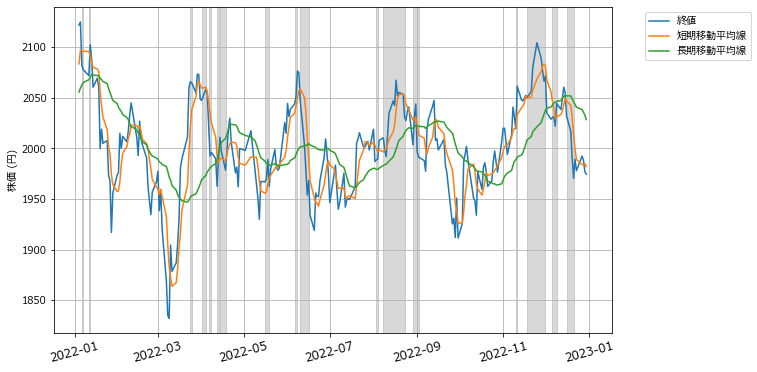

In [228]:
uds_dict = {}
trade_dict = {}
lx_dummy = LearnXGB(num_class=3)
F_list = []
F_lis_dict = {}
# limit_year = 2009
alpha = 0.34
cut_off = 6
order = 4
width = 20
stride=5
# for year in range(limit_year+2,2022):
    # print(year)
start_month=1
end_month = 12
start_year = 2022
end_year = 2022
# value_list = value_dict[str(year-1)]
lx_ = lx

x_ng,x_nb,x_rg,x_rb = funcs.return_clx(value_list)

try:
    Fstrategies= funcs.return_uds(lx_,x_ng,x_nb,x_rg,x_rb,UpDownSimulation,width=width,stride=stride,\
        cut_off=cut_off,order=order)
    """
    # Fstrategies をどんどん加算していく    
    # if len(uds_dict)>0:
    #     last_key = next(reversed(uds_dict),None)
    #     Fstrategies_old = uds_dict[last_key].Ustrategies
    #     Fstrategies = return_cumulative_fst(Fstrategies,Fstrategies_old)
    """
except Exception as e:
    print(e)
    last_key = next(reversed(uds_dict),None)
    Fstrategies = uds_dict[last_key].Ustrategies

# ffs = FFTSimulation(lx,Fstrategies,width=width,window_type=window_type)
uds = UpDownSimulation(lx_,Fstrategies,width=width,alpha=alpha)
uds.simulate(LocalPaths.RAW_TOPIX_LATEST_PATH,LocalPaths.RAW_DAW_LATEST_PATH,start_year=start_year,end_year=end_year,is_validate=False,cut_off=cut_off,order=order)

uds_dict[str(year)] = uds
trade_dict[str(year)] = uds.trade_log
F_lis_dict[str(year)] = F_list

# return uds_dict, trade_dict, F_lis_dict

   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         -87.5         -3.5            7        54.5       -83.0   

   mean_profit  cant_buy_count  
1        -12.5               0  



<Figure size 432x288 with 0 Axes>

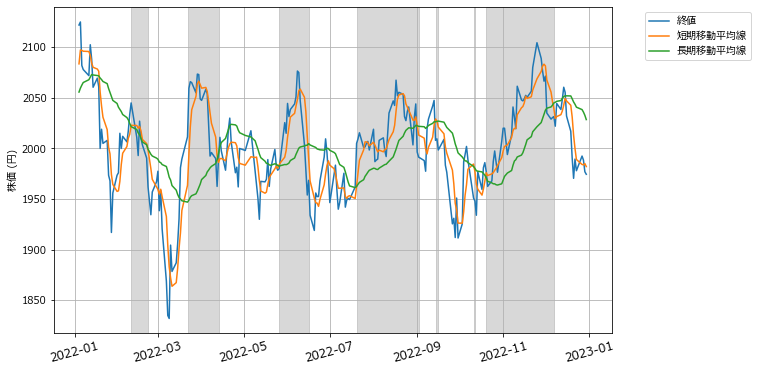

In [229]:
ts = TechnicalSimulation(hold_day=1000)
ts.simulate(
    LocalPaths.RAW_TOPIX_LATEST_PATH,
    LocalPaths.RAW_DAW_LATEST_PATH,
    start_year=2022,
    end_year=2022
    )